Import Neccessary Libraries

In [2]:
pip install tensorflow_datasets

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.7/5.0 MB 20.2 MB/s eta 0:00:01
   ----------- ---------------------------- 1.5/5.0 MB 19.2 MB/s eta 0:00:01
   ----------------- ---------------------- 2.3/5.0 MB 17.9 MB/s eta 0:00:01
   -------------------------- ------------- 3.3/5.0 MB 19.0 MB/s eta 0:00:01
   -------------------------- ------------- 3.3/5.0 MB 16.3 MB/s eta 0:00:01
   ----------------------------- ---------- 3.7/5.0 MB 13.9 MB/s eta 0:00:01
   ------------------------------------ --- 4.6/5.0 MB 14.6 MB/s eta 0:00:01
   ---------------------------------------- 5.0/5.0 MB 14.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/140.6 kB ? eta -:--:--
   ---------------------------------------- 140.6/140.6 kB ? eta 0:00:00
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--


  You can safely remove it manually.

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install tfds-nightly

   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   --- ------------------------------------ 0.4/5.0 MB 12.2 MB/s eta 0:00:01
   ------- -------------------------------- 0.9/5.0 MB 11.7 MB/s eta 0:00:01
   ------------- -------------------------- 1.7/5.0 MB 13.4 MB/s eta 0:00:01
   -------------------- ------------------- 2.6/5.0 MB 15.0 MB/s eta 0:00:01
   ---------------------------- ----------- 3.6/5.0 MB 16.4 MB/s eta 0:00:01
   ----------------------------------- ---- 4.5/5.0 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------  5.0/5.0 MB 16.1 MB/s eta 0:00:01
   ---------------------------------------- 5.0/5.0 MB 16.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install resource


[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3338 sha256=3e03bc37acd7d5e38bcf7a62fd3bce5ef54b25e9d40f05d3d09ddb9c5853ff54
  Stored in directory: c:\users\kaiya\appdata\local\pip\cache\wheels\2e\bd\ab\c1026535edf314ce2b0d7ba3b2dd0ca67bfb5bae2cb301510f
  Created wheel for JsonSir: filename=JsonSir-0.0.2-py3-none-any.whl size=4777 sha256=353792dce74a28378fa349fef7f5514e33f44825a304ea0745d31d6ba1fa7253
  Stored in directory: c:\users\kaiya\appdata\local\pip\cache\wheels\bb\e7\72\08831f4f1927bfcb155f0a971e253bfe677172cebea1332b51
Successfully built JsonForm JsonSir


In [1]:
!pip show tensorflow_datasets


Name: tensorflow-datasets
Version: 4.9.3
Summary: tensorflow/datasets is a library of datasets ready to use with TensorFlow.
Home-page: https://github.com/tensorflow/datasets
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\kaiya\appdata\local\programs\python\python39\lib\site-packages
Requires: absl-py, array-record, click, dm-tree, etils, numpy, promise, protobuf, psutil, requests, tensorflow-metadata, termcolor, toml, tqdm, wrapt
Required-by: 


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.17.0


Data Loading and Preprocessing

In [2]:
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'oxford_flowers102',
    split=['train', 'validation', 'test'],
    shuffle_files=True,
    as_supervised=True,  # Include labels
    with_info=True
)
print(f"Dataset Info:\n{ds_info}")
num_classes = ds_info.features['label'].num_classes
print(f"Number of classes: {num_classes}")

Dataset Info:
tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/da

Data Visualization

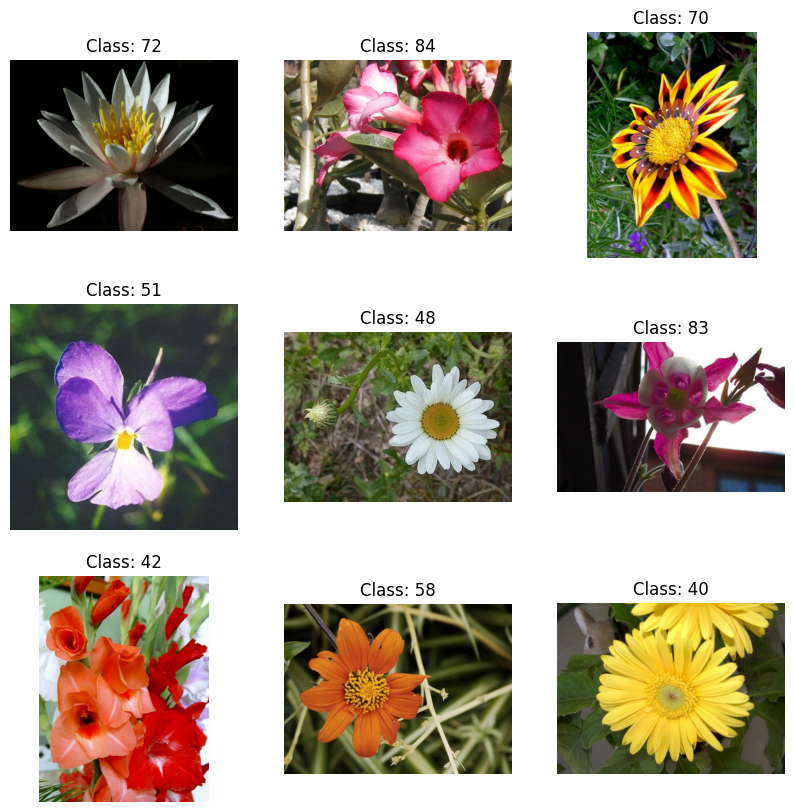

In [3]:
#visualize a few samples from the training set
def visualize_samples(dataset, num_samples=9):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(num_samples)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.title(f"Class: {label.numpy()}")
        plt.axis("off")
    plt.show()

visualize_samples(ds_train)


Data Preprocessing

In [4]:
IMG_SIZE = 128  # You can adjust this size
BATCH_SIZE = 32



In [5]:
def preprocess(image, label):
    # Resize and normalize images
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0  # Normalize to [0,1]
    return image, label


In [6]:
ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

ds_val = ds_val.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_val = ds_val.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


Data Augmentation

In [7]:
# Define data augmentation with input_shape
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])



c:\Users\kaiya\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


CNN architecture

In [8]:
from tensorflow.keras import layers, models, regularizers

num_classes = 102  # Number of flower classes

# Regularization parameter
l2_reg = 1e-4  # You can adjust this value

model = models.Sequential()

# Input Layer with Data Augmentation
model.add(data_augmentation)

# Block 1
model.add(layers.Conv2D(
    32, (3, 3), padding='same', kernel_initializer='he_normal',
    kernel_regularizer=regularizers.l2(l2_reg)
))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(
    32, (3, 3), padding='same', kernel_initializer='he_normal',
    kernel_regularizer=regularizers.l2(l2_reg)
))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Block 2
model.add(layers.Conv2D(
    64, (3, 3), padding='same', kernel_initializer='he_normal',
    kernel_regularizer=regularizers.l2(l2_reg)
))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(
    64, (3, 3), padding='same', kernel_initializer='he_normal',
    kernel_regularizer=regularizers.l2(l2_reg)
))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Block 3
model.add(layers.Conv2D(
    128, (3, 3), padding='same', kernel_initializer='he_normal',
    kernel_regularizer=regularizers.l2(l2_reg)
))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(
    128, (3, 3), padding='same', kernel_initializer='he_normal',
    kernel_regularizer=regularizers.l2(l2_reg)
))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Block 4
model.add(layers.Conv2D(
    256, (3, 3), padding='same', kernel_initializer='he_normal',
    kernel_regularizer=regularizers.l2(l2_reg)
))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(
    256, (3, 3), padding='same', kernel_initializer='he_normal',
    kernel_regularizer=regularizers.l2(l2_reg)
))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

# Block 5 (Optional)
# model.add(layers.Conv2D(
#     512, (3, 3), padding='same', kernel_initializer='he_normal',
#     kernel_regularizer=regularizers.l2(l2_reg)
# ))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Conv2D(
#     512, (3, 3), padding='same', kernel_initializer='he_normal',
#     kernel_regularizer=regularizers.l2(l2_reg)
# ))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.5))

# Classification Head
model.add(layers.Flatten())
model.add(layers.Dense(
    512, activation='relu', kernel_initializer='he_normal',
    kernel_regularizer=regularizers.l2(l2_reg)
))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 9,619,590 (36.70 MB)

 Trainable params: 9,616,646 (36.68 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [9]:
optimizer = keras.optimizers.Adam(learning_rate=1e-2)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6  # Set a minimum learning rate to prevent it from becoming too low
)

Training the Model

In [11]:
callbacks = [
    keras.callbacks.EarlyStopping(
        patience=10, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(
        'best_model.keras', save_best_only=True),
    lr_scheduler
]



In [12]:
epochs = 50  # Adjust the number of epochs as needed

history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=epochs,
    callbacks=callbacks
)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 698ms/step - accuracy: 0.0093 - loss: 6.9886 - val_accuracy: 0.0098 - val_loss: 7263.2188 - learning_rate: 0.0100
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 700ms/step - accuracy: 0.0331 - loss: 8.3227 - val_accuracy: 0.0127 - val_loss: 398.4010 - learning_rate: 0.0100
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 699ms/step - accuracy: 0.0322 - loss: 8.2392 - val_accuracy: 0.0137 - val_loss: 39.3486 - learning_rate: 0.0100
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 696ms/step - accuracy: 0.0459 - loss: 7.4675 - val_accuracy: 0.0216 - val_loss: 22.4503 - learning_rate: 0.0100
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 700ms/step - accuracy: 0.0745 - loss: 7.1471 - val_accuracy: 0.0373 - val_loss: 15.2005 - learning_rate: 0.0100
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 704ms/step - accuracy: 0.1036 - loss: 6.6057 - val_accuracy: 0.0559 - val_loss: 7.2143 - learning_rate: 0.0100
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 694ms/step - accuracy: 0.0871 - 

Plot Training History

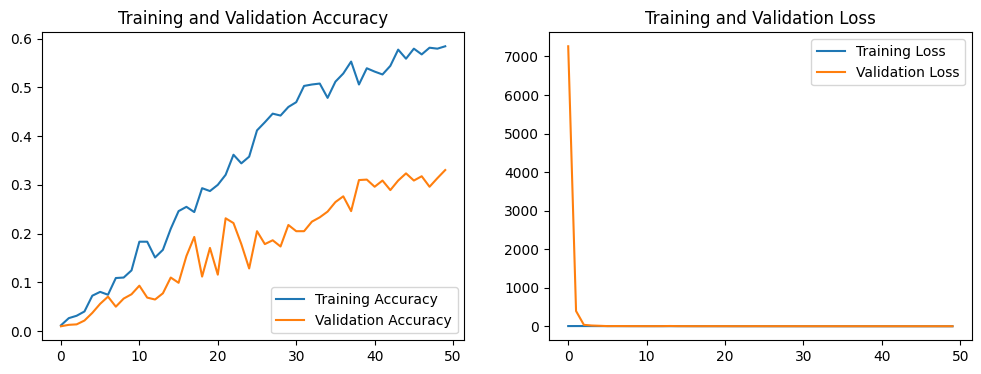

In [13]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_history(history)


Evaluate on the Test Set

In [14]:
test_loss, test_accuracy = model.evaluate(ds_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 119ms/step - accuracy: 0.2664 - loss: 4.2453
Test Accuracy: 0.2631


Make Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


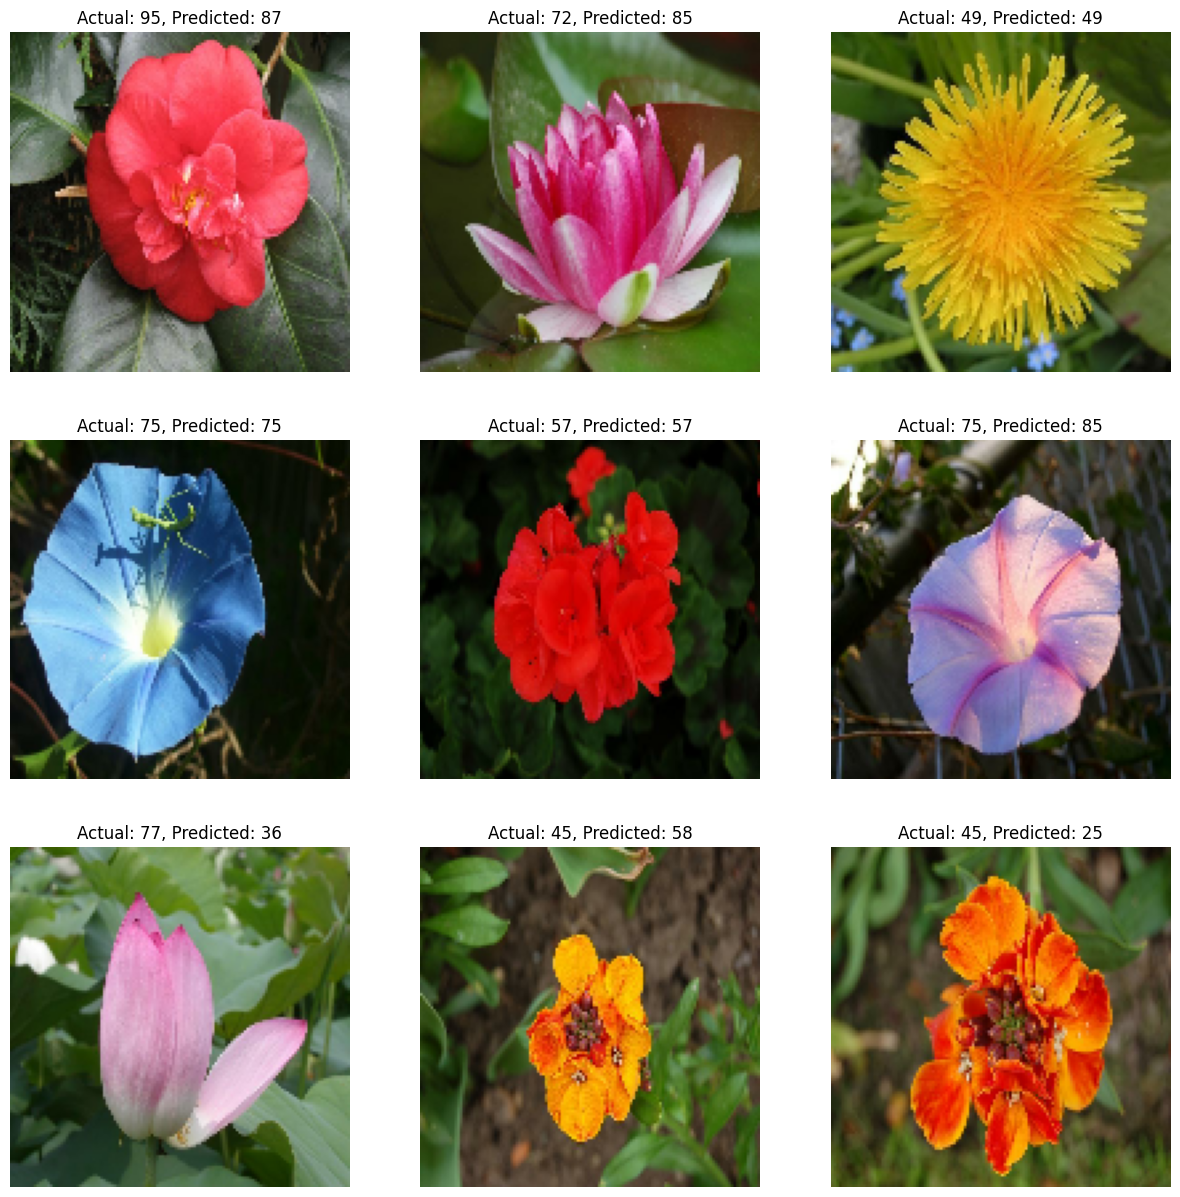

In [15]:
#Visualize 9 predictions
for images, labels in ds_test.take(1):
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    plt.figure(figsize=(15, 15))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        actual_label = labels[i].numpy()
        predicted_label = predicted_labels[i]
        plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
        plt.axis("off")
    plt.show()


Save the Model

In [ ]:
model.save('flower_classification_model')


In [ ]:
loaded_model = keras.models.load_model('flower_classification_model')


In [ ]:
loaded_test_loss, loaded_test_accuracy = loaded_model.evaluate(ds_test)
print(f'Loaded Model Test Accuracy: {loaded_test_accuracy:.4f}')
